# Exercises: Variance
By Christopher van Hoecke, Maxwell Margenot, and Delaney Mackenzie

## Lecture Link :
https://www.quantopian.com/lectures/variance

### IMPORTANT NOTE: 
This lecture corresponds to the Variance lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

-----

In [1]:
# Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data:

In [2]:
X = np.random.randint(100, size = 100)

---

# Exercise 1: 
Using the skills aquired in the lecture series, find the following parameters of the list X above:
- Range
- Mean Absolute Deviation
- Variance and Standard Deviation
- Semivariance and Semideviation
- Target variance (with B = 60)

In [5]:
# Range of X
range_X = X.max()-X.min()

range_X

99

In [7]:
# Mean Absolute Deviation
# First calculate the value of mu (the mean)

mu = np.mean(X)

## Your code goes here
np.abs(X-mu).sum()/len(X)

23.851200000000002

In [11]:
# Variance and standard deviation

## Your code goes here
X.var(), X.std()

(780.3891, 27.935445226450213)

In [16]:
# Semivariance and semideviation

## Your code goes here
np.where(X<mu)

(array([ 1,  2,  6,  7,  8,  9, 16, 17, 20, 21, 22, 23, 29, 32, 43, 44, 45,
        46, 47, 49, 50, 51, 52, 59, 60, 64, 65, 66, 69, 70, 71, 72, 73, 74,
        75, 76, 78, 79, 82, 83, 84, 86, 87, 89, 90, 91, 93, 94, 95, 96, 97,
        99]),)

In [15]:
mu

43.03

In [33]:
X_l = X[np.where(X<mu)]
semivar = ((X_l-mu)**2).sum()/len(X_l)


semivar, np.sqrt(semivar)

(674.702053846154, 25.97502750424249)

---

# Exercise 2:
Using the skills aquired in the lecture series, find the following parameters of prices for AT&T stock over a year:
- 30 days rolling variance 
- 15 days rolling Standard Deviation

In [36]:
from yahoofinancials import YahooFinancials

In [37]:
# Replacement of quantopian function for YahooFinance function
def get_pricing(ticker, fields='close', start_date='2005-01-01', end_date='2010-01-01'):
    yf = YahooFinancials(ticker)
    ticker_price_info = yf.get_historical_price_data(start_date, end_date, 'daily')
    return pd.DataFrame(ticker_price_info[ticker]['prices'])[fields]

In [38]:
att = get_pricing('T', fields='open', start_date='2016-01-01', end_date='2017-01-01')

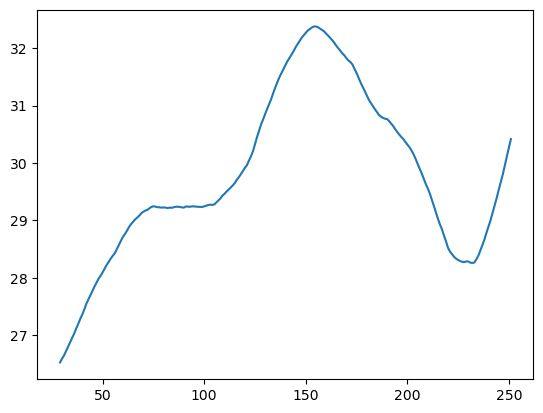

In [44]:
# Rolling mean

## Your code goes here
plt.plot(att.rolling(window=30).mean());

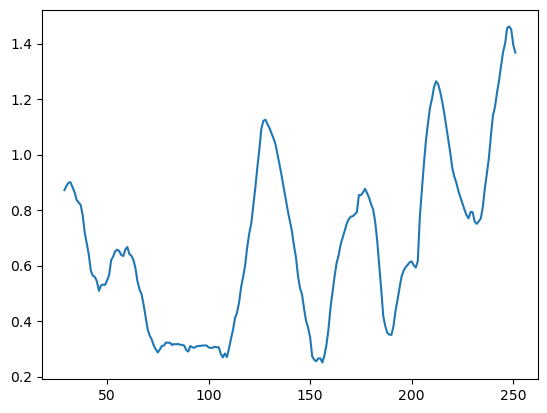

In [45]:
# Rolling standard deviation

## Your code goes here
plt.plot(att.rolling(window=30).std());

---

# Exercise 3 : 
The portfolio variance is calculated as

$$\text{VAR}_p = \text{VAR}_{s1} (w_1^2) + \text{VAR}_{s2}(w_2^2) + \text{COV}_{S_1, S_2} (2 w_1 w_2)$$

Where $w_1$ and $w_2$ are the weights of $S_1$ and $S_2$.

Find values of $w_1$ and $w_2$ to have a portfolio variance of 50. 

In [46]:
asset1 = get_pricing('AAPL', fields='open', start_date='2016-01-01', end_date='2017-01-01')
asset2 = get_pricing('XLF', fields='open', start_date='2016-01-01', end_date='2017-01-01')

cov = np.cov(asset1, asset2)[0,1]

v1 = np.var(asset1)
v2 = np.var(asset2)


In [48]:
a = v1+v2-(2*cov)
b = (2*cov)-(2*v2)
c = v2 - 50

In [49]:
def quadratic(a,b,c):
    return (-b + np.sqrt((b**2)-(4*a*c)))/(2*a), (-b - np.sqrt((b**2)-(4*a*c)))/(2*a)

In [51]:
w1_1, w1_2 = quadratic(a,b,c)
w1_1, w1_2

(4.810473962159535, -4.127950428245292)

In [56]:
w1 = w1_1
w2 = 1-w1
w1,w2

(4.810473962159535, -3.810473962159535)

In [58]:
pvariance = (w1**2)*v1+(w2**2)*v2+(2*w1*w2)*cov
pvariance

49.999999999999986

In [59]:
def fpvariance(w1, v1, w2, v2, cov):
    return (w1**2)*v1+(w2**2)*v2+(2*w1*w2)*cov

In [70]:
w1s = np.arange(0,1.0005,0.0005)
pvar = np.array([[i,1-i,fpvariance(i,v1,(1-i),v2,cov)] for i in w1s])
    

In [97]:
pvar[np.where(pvar[:,2]==pvar[:,2].min())]

array([[0.3415    , 0.6585    , 2.55174199]])

In [102]:
a,b,c

(2.3755179890175704, -1.6213469327411305, 1.0308227782896013)

In [104]:
v1,v2,cov

(3.5825647682896014, 2.828393712013162, 2.0177202456425967)

In [106]:
c = v2 - 2.55174199
w1_1,w1_2 = quadratic(a,b,c)
w1_1,w1_2

(0.3415023939626355, 0.3410211399516086)

In [107]:
fpvariance(w1_1,v1,1-w1_1,v2,cov)

2.55174199

In [108]:
fpvariance(w1_2,v1,1-w1_2,v2,cov)

2.55174199

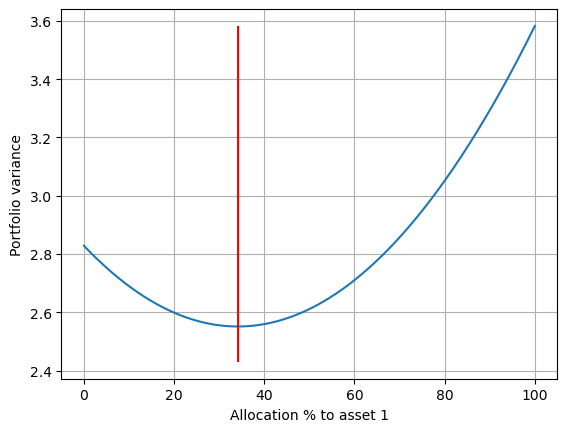

In [96]:
plt.plot(pvar[:,0]*100,pvar[:,2])
plt.vlines(x=pvar[np.where(pvar[:,2]==pvar[:,2].min()),0]*100,ymin=pvar[:,2].min()/1.05,
           ymax=pvar[:,2].max(), color='r')
plt.xlabel('Allocation % to asset 1')
plt.ylabel('Portfolio variance')
plt.grid()

---

Congratulations on completing the Variance exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*